### 1. TensorFlow - 基本概念

* Tensor (張量) : 為TensorFlow的基本資料結構, 可視為一個多維的陣列或串列
* 級別 (Rank) : 維度單位, 表示Tensor的維數
* 形狀 (Shape): 表示Tensor有幾列幾行 
* 型別 (Type): 指定Tensor的資料型別


### 1.0 安裝Tensorflow

系統要求 : <br> 
* Ubuntu 16.04 或更高版本（64 位）
* macOS 10.12.6 (Sierra) 或更高版本（64 位）（不支持 GPU）
* Windows 7 或更高版本（64 位）（僅支持 Python 3.4 / 3.5 /3.6 ）
* Raspbian 9.0 或更高版本

Install Command : 
* pip3 install --upgrade tensorflow

#### 1.1 引入程式庫

In [1]:
import tensorflow as tf

#### 1.2 Hello TensorFlow

Session() :  Client端程式和Tensorflow系統建立通訊時所建立(初始化圖形)


In [2]:
import tensorflow as tf
hello = tf.constant("Hello World - TensorFlow!!")
print(hello)


Tensor("Const:0", shape=(), dtype=string)


In [3]:
# session = tf.Session()
# print(session.run(hello))
# session.close()

# with tf.Session() as session:
#     print(session.run(hello))

#### 1.3 TensorFlow -Constant (常數) , Variable （變數）& placeHolder(預留位）




In [4]:
#tf.constant(value, dtype, shape, name)

import tensorflow as tf
x = tf.constant(10,name='a')
y = tf.constant(20,name='b')

print(x,y)
z = tf.constant(10,name='c')
print(z)
with tf.Session() as session:
    print('x :%d'%(session.run(x)))
    print('y :%d'%(session.run(y)))


Tensor("a:0", shape=(), dtype=int32) Tensor("b:0", shape=(), dtype=int32)
Tensor("c:0", shape=(), dtype=int32)
x :10
y :20


In [5]:
#tf.Variable(<initial-value>, name=<optional-name>)

import tensorflow as tf
x = tf.constant(20,name = 'x')
y = tf.Variable(x+9, name = 'y')
print(y)

model = tf.initialize_all_variables() 
#model = tf.global_variables_initializer() 

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'y:0' shape=() dtype=int32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
29


In [6]:
#tf.placeholder(dtype,shape=None,name=None)

import tensorflow as tf
import numpy as np


x = tf.placeholder(tf.float32, shape=(2,2))
y = tf.matmul(x, x)

with tf.Session() as sess:
    #print(sess.run(y))  # ERROR: will fail because x was not feed.
    rand_array = np.random.rand(2,2)
    print(rand_array)
    print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.


[[0.21430189 0.17410819]
 [0.69486495 0.3112989 ]]
[[0.16690698 0.0915114 ]
 [0.36522156 0.21788868]]


#### 1.3 Tensor-張量

Tensor : 可以視為一個多維陣列或串列
rank (級別) :
shape (形狀) :
type (型別) :




In [7]:
# 初始化 一維張量
import numpy as np
tensor_1d = np.array([1.5,1.3,2.9,3,7])
print(tensor_1d)
print(tensor_1d[0])
print(tensor_1d[1])
print(tensor_1d.ndim) # rank
print(tensor_1d.shape) # shape
print(tensor_1d.dtype) # type


[1.5 1.3 2.9 3.  7. ]
1.5
1.3
1
(5,)
float64


In [8]:
import tensorflow as tf

tf_sensor = tf.convert_to_tensor(tensor_1d,dtype=tf.float64)

with tf.Session() as sess :
    print(sess.run(tf_sensor))
    print(sess.run(tf_sensor[0]))


[1.5 1.3 2.9 3.  7. ]
1.5


In [9]:
# 初始化 二維張量

import numpy as np
tensor_2d = np.array([(1,2,3,4),(5,6,7,8),(9,10,11,12)])
print(tensor_2d)
print(tensor_2d[2][2])
print(tensor_2d[0:2,0:2])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
11
[[1 2]
 [5 6]]


In [10]:
import tensorflow as tf
import numpy as np

matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='int32')
print(matrix1)
print(matrix2)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [11]:
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

matrix_product = tf.matmul(matrix1,matrix2)
matrix_sum = tf.add(matrix1,matrix2)

print(matrix_product)
print(matrix_sum)


Tensor("MatMul_1:0", shape=(3, 3), dtype=int32)
Tensor("Add_1:0", shape=(3, 3), dtype=int32)


In [12]:
matrix3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype='float32')
matrix_det = tf.matrix_determinant(matrix3)


In [13]:
with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)

print(result1)
print(result2)
print(result3)

[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
56.00002


### TensorFlow 常用運算子

|運算子|說明|
|-----------|---------|
|tf.add|回傳加總的和|
|tf.subtract|回傳相減的差|
|tf.multiply|回傳相乘後的值|
|tf.div|回傳相除後的值|
|tf.mod|回傳取餘數的值|
|tf.abs|回傳絕對值|
|tf.negative|回傳負值|
|tf.sign|回傳正負符號值|
|tf.square|回傳平方值|
|tf.round|回傳最接近的整數值|
|tf.sqrt|回傳平方根植|
|tf.pow|回傳平方值|
|tf.exp|回傳指數值|
|tf.log|回傳對數值|
|tf.maximum|回傳最大值|
|tf.minium|回傳最小值|
|tf.cos|回傳餘弦值|
|tf.sin|回傳正弦值|

In [14]:
import tensorflow as tf

a = 5
b = 2

result_add = tf.add(a,b)
result_sub = tf.subtract(a,b)
result_mul = tf.multiply(a,b)
result_div = tf.div(a,b)
result_mod = tf.mod(a,b)
result_abs = tf.abs(-10)
result_neg = tf.negative(10) 
#result_neg = tf.negative(-10)
result_sign = tf.sign(10)  # y = sign(x) = -1 if x < 0; 0 if x == 0 or tf.is_nan(x); 1 if x > 0 
result_square = tf.square(2) 

with tf.Session() as sess:
    print(sess.run(result_add))
    print(sess.run(result_sub))
    print(sess.run(result_mul))
    print(sess.run(result_div))
    print(sess.run(result_mod))
    print(sess.run(result_abs))
    print(sess.run(result_neg))
    print(sess.run(result_sign))
    



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
7
3
10
2
1
10
-10
1


#### Example 1 計算梯度 (gradient) 

In [15]:
import tensorflow as tf

In [16]:
x = tf.placeholder(tf.float32)

In [17]:
y = 5*x*x

In [18]:
grad = tf.gradients(y,x)

In [19]:
with tf.Session() as session:
    grad_value = session.run(grad,feed_dict={x:1})
    print(grad_value)
    

[10.0]


#### Example2 隨機數值 

In [20]:
#均勻分布
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
uniform = tf.random_uniform([100],minval=0,maxval=1,dtype=tf.float32)
print(uniform)

Tensor("random_uniform:0", shape=(100,), dtype=float32)


[0.07137561 0.43513823 0.6387     0.10288906 0.7148433  0.17876232
 0.65577877 0.923398   0.50639844 0.35989165 0.4600103  0.7430811
 0.93064487 0.71145403 0.7290329  0.40440094 0.00808036 0.05377436
 0.38097262 0.34749758 0.31472147 0.5042325  0.3912716  0.9773884
 0.24831152 0.13998592 0.63877976 0.55323637 0.5106596  0.48740816
 0.65387356 0.09477413 0.40611625 0.8227577  0.00322342 0.9285338
 0.52939177 0.9957074  0.8430941  0.850932   0.62779343 0.6624137
 0.80376565 0.8273816  0.57367    0.88930464 0.35232818 0.37699282
 0.8270203  0.5320885  0.27904952 0.4025588  0.17221081 0.6094258
 0.8867097  0.23669684 0.7897192  0.904865   0.73764205 0.6786921
 0.55897045 0.99976325 0.47524333 0.2612555  0.72872996 0.17809272
 0.63468623 0.18481565 0.81351066 0.5160428  0.27498543 0.7662375
 0.5347811  0.15819454 0.44052994 0.04345882 0.76225233 0.29721153
 0.90066767 0.6745552  0.3524276  0.9109968  0.09926248 0.54471993
 0.55837476 0.46629202 0.00692701 0.4498812  0.14276028 0.7730837
 0.

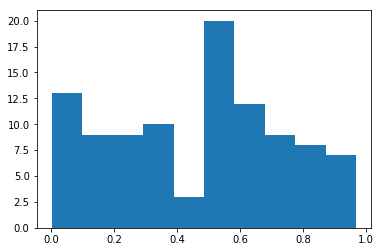

In [22]:
with tf.Session() as session:
    print(uniform.eval())
    plt.hist(uniform.eval())
      

In [23]:
#常態分布
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
norm = tf.random_normal([100],mean=0,stddev=1)
print(norm)

Tensor("random_normal:0", shape=(100,), dtype=float32)


[-2.052722    0.77352476 -0.89672947  0.7463963  -0.8016909   1.3223372
  1.6966574  -1.4299331   0.9674496   0.8056826  -0.15373123  0.75949544
  0.8561931  -1.4150721   0.28794155 -0.47045693  0.34529892 -0.08507732
  1.2778959   0.04858794  0.1568036   0.6948106  -1.2513602  -0.42405874
  1.1452626   0.79386467 -0.13635708  1.8135011   0.00267414 -0.70335126
  0.42777455 -0.5220322  -1.4930487  -0.252804    0.84081376  1.0318295
 -0.38263172  0.04851265  1.6370106   0.24890988  0.5934625   1.1167142
 -1.9794458   0.550731   -0.45496908 -0.24480872  0.10415655  0.38414624
 -0.7763562   0.6183054   0.91361463 -0.5420326   0.94066334  0.32001743
  0.05181344 -0.9237027  -1.1827054  -0.12202746 -0.31102115 -0.01959534
  0.79807675 -1.5152106  -0.21475372  0.15101217  1.4966081  -1.9831976
  2.3090842   0.72606766  1.0661914   0.13284904 -0.11772056 -1.2859849
  0.17904094 -0.48751822  1.9131706   0.22070627 -0.43931526 -0.39101484
  0.5976753  -0.18775423 -0.90372443  1.3952918   1.6461

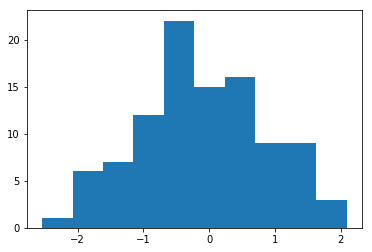

In [25]:
with tf.Session() as session:
    print(norm.eval())
    plt.hist(norm.eval())
      

#### Example3 線性迴歸


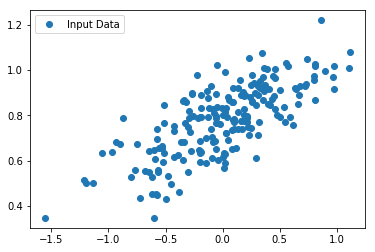

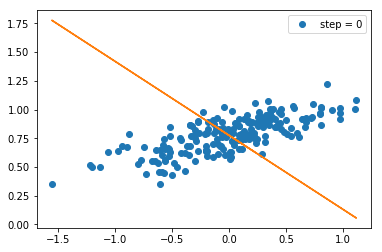

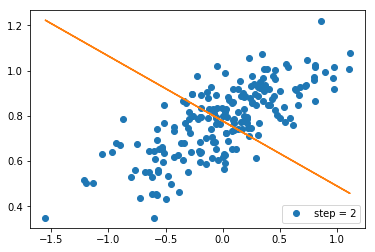

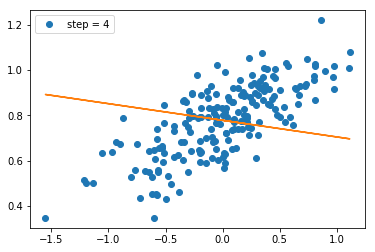

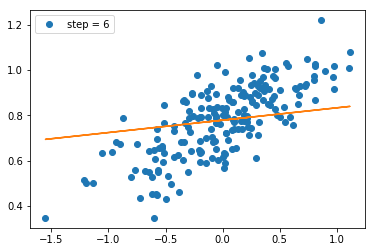

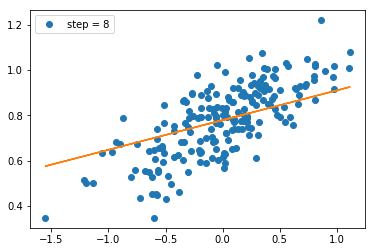

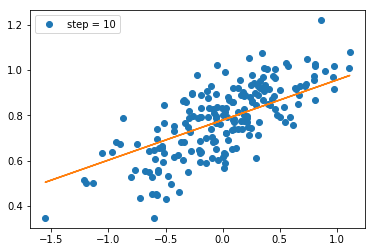

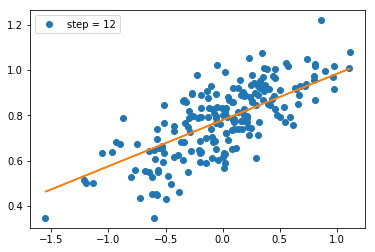

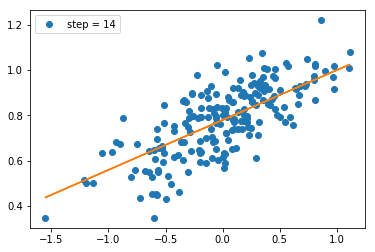

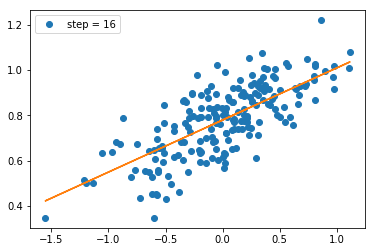

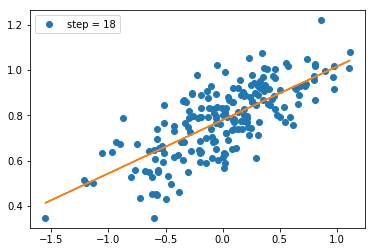

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []
a = 0.22
b = 0.78
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])


plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend()
plt.show()


A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

cost_function = tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5) # 學習率(lerarning rate) => 決定多快會移動到最佳的權重, 值大: 忽略最佳解, 值小 : 需多次迭代來收斂至最佳解  
train = optimizer.minimize(cost_function)

model = tf.initialize_all_variables()

with tf.Session() as session:
        session.run(model)
        for step in range(0,20):
                session.run(train)
                if (step % 2) == 0:
                        plt.plot(x_point, y_point,
                                 'o',label='step = {}'.format(step))
                        plt.plot(x_point,
                                 session.run(A) * x_point + session.run(B))
                        plt.legend()
                        plt.show()


####  Example4 MNIST
* 0 ~ 9 手寫數字黑白圖像
* 資料筆數 :70000

In [27]:
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST/",one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [28]:
pixels,real_values = mnist.train.next_batch(10)

In [29]:
print(real_values)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


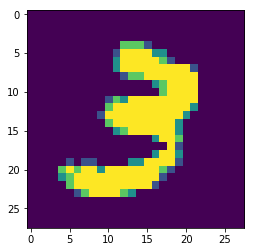

In [30]:
image = pixels[1]
image = np.reshape(image,[28,28])
plt.imshow(image)

### KNN

In [52]:
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST/",one_hot=True)


Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [53]:
train_pixels,train_list_values = mnist.train.next_batch(100)

In [54]:
test_pixels,test_list_values = mnist.train.next_batch(20)

In [55]:
import tensorflow as tf

In [56]:
train_pixels_tensor = tf.placeholder("float",[None,784])

In [57]:
test_pixels_tensor = tf.placeholder("float",[784])

In [58]:
distance = tf.reduce_sum(tf.abs(tf.add(train_pixels_tensor,tf.negative(test_pixels_tensor))),reduction_indices=1)

In [59]:
pred = tf.argmin(distance, 0)

In [60]:
init = tf.initialize_all_variables()

In [63]:
with tf.Session() as sess:
    accuracy = 0
    sess.run(init)
    for i in range(len(test_list_values)):
        nn_index = sess.run(pred,feed_dict={train_pixels_tensor:train_pixels,test_pixels_tensor:test_pixels[i,:]})
        print("Test N° ", i,"Predicted Class: ",np.argmax(train_list_values[nn_index]),"True Class: ", np.argmax(test_list_values[i]))
       
   

Test N°  0 Predicted Class:  6 True Class:  6
Test N°  1 Predicted Class:  7 True Class:  7
Test N°  2 Predicted Class:  1 True Class:  2
Test N°  3 Predicted Class:  1 True Class:  1
Test N°  4 Predicted Class:  7 True Class:  7
Test N°  5 Predicted Class:  3 True Class:  8
Test N°  6 Predicted Class:  2 True Class:  2
Test N°  7 Predicted Class:  0 True Class:  0
Test N°  8 Predicted Class:  2 True Class:  2
Test N°  9 Predicted Class:  7 True Class:  9
Test N°  10 Predicted Class:  1 True Class:  2
Test N°  11 Predicted Class:  6 True Class:  6
Test N°  12 Predicted Class:  7 True Class:  3
Test N°  13 Predicted Class:  0 True Class:  0
Test N°  14 Predicted Class:  0 True Class:  0
Test N°  15 Predicted Class:  2 True Class:  2
Test N°  16 Predicted Class:  9 True Class:  9
Test N°  17 Predicted Class:  1 True Class:  3
Test N°  18 Predicted Class:  4 True Class:  9
Test N°  19 Predicted Class:  7 True Class:  4
